## V1535 Sco Brightness Temperature Work

In [16]:
#imports

import numpy as np
import pandas as pd
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data_novas = (
['V392 Per',	3.40,    	0.78,			0.33,			'Gaia DR3 Parallax'],
['V1535 Sco',	7.79,	  	0.75,	        	0.69,			'Gaia DR3 Parallax'],
['V5589 Sgr',	8.04,		1.78,			1.35,			'Extinctions / Mass Model'],)

df_novas = pd.DataFrame(data_novas, columns = ['Nova', 'Distance', 'Distance Error (+)', 'Distance Error (-)', 'Distance Source'])

df_novas

,Nova,Distance,Distance Error (+),Distance Error (-),Distance Source
0,V392 Per,3.40,0.78,0.33,Gaia DR3 Parallax
1,V1535 Sco,7.79,0.75,0.69,Gaia DR3 Parallax
2,V5589 Sgr,8.04,1.78,1.35,Extinctions / Mass Model


In [18]:
#data from V1535 Sco split into frequency

In [19]:

f1_26 = ([1.2600,	8.0000,	0.78,	0.1200,	122.3630],
         [1.2600,	8.0000,	0.531,	0.1770,	93.463],
         [1.2600,	15.6000,	0.32,	0.1100,	78.463],
         [1.2600,	16.6000,	0.4440,	0.0820,	65.513],
         [1.2600,	15.7000,	0.8700,	0.1000,	55.733],
         [1.2600,	15.6000,	0.609,	0.1120,	41.633],
         [1.2600,	15.6000,	0.374,	0.0740,	26.563],
         [1.2600,	15.6000,	0.317,	0.1000,	17.663],
         [1.2600,	15.6000,	1.5700,	0.0900,	7.663],
        )

f1_74 = ([1.7400,	8.0000,	0.233,	0.0780,	122.3630],
         [1.7400,	8.0000,	0.336,	0.0780,	93.463],
         [1.7400,	15.6000,	0.378,	0.0710,	78.463],
         [1.7400,	16.6000,	0.2580,	0.0570,	65.513],
         [1.7400,	15.7000,	0.6610,	0.0600,	55.733],
         [1.7400,	15.6000,	0.271,	0.0600,	41.633],
         [1.7400,	15.6000,	0.271,	0.0540,	26.563],
         [1.7400,	15.6000,	0.317,	0.0660,	17.663],
         [1.7400,	15.6000,	1.2100,	0.0810,	7.6630],
        )

f4_55 = ([5.0000,	8.0000,	0.0806,	0.0200,	122.3630],
         [4.5500,	8.0000,	0.0727,	0.0230,	93.463],
         [4.5500,	13.6000,	0.1700,	0.0190,	78.463],
         [4.5500,	14.6000,	0.2560,	0.0190,	65.513],
         [4.5500,	13.7000,	0.4830,	0.0240,	55.733],
         [4.5500,	13.8000,	0.2220,	0.0170,	41.633],
         [4.5500,	13.5000,	0.4550,	0.0230,	26.563],
         [4.5500,	13.6000,	0.2210,	0.0190,	17.663],
         [4.5500,	13.6000,	0.6500,	0.0260,	7.6630],
         [4.5500,	13.6000,	4.1300,	0.1300,	2.6630],
        )

f7_38 = ([7.0000,	8.0000,	0.111,	0.0220,	122.3630],
         [7.3800,	8.0000,	0.0708,	0.0170,	93.463],
         [7.3800,	13.6000,	0.1390,	0.0150,	78.463],
         [7.3800,	14.6000,	0.2280,	0.0140,	65.513],
         [7.3800,	13.7000,	0.3740,	0.0180,	55.733],
         [7.3800,	13.8000,	0.2530,	0.0140,	41.633],
         [7.3800,	13.5000,	0.5360,	0.0210,	26.563],
         [7.3800,	13.6000,	0.1920,	0.0170,	17.663],
         [7.3800,	13.6000,	0.4390,	0.0180,	7.6630],
         [7.3800,	13.6000,	2.7860,	0.0850,	2.6630],
        )

f13_5 = ([13.5000,	8.0000,	0.106,	0.0160,	122.3630],
         [13.5000,	8.0000,	0.0518,	0.0180,	93.463],
         [13.5000,	12.1000,	0.1290,	0.0170,	78.503],
         [13.5000,	12.0000,	0.2090,	0.0170,	66.493],
         [13.5000,	12.5000,	0.4570,	0.0280,	54.563],
         [13.5000,	12.0000,	0.2670,	0.0150,	41.583],
         [13.5000,	12.0000,	0.5850,	0.0240,	23.663],
         [13.5000,	12.5000,	0.3850,	0.0200,	12.763],
         [13.5000,	11.9000,	0.4160,	0.0210,	6.663],
        )

f17_4 = ([16.5000,	8.0000,	0.120,	0.0210,	122.3630],
         [16.5000,	8.0000,	0.0859,	0.0210,	93.463],
         [17.4000,	12.1000,	0.1640,	0.0220,	78.503],
         [17.4000,	12.0000,	0.1670,	0.0230,	66.493],
         [17.4000,	12.5000,	0.3990,	0.0220,	54.563],
         [17.4000,	12.0000,	0.2990,	0.0170,	41.583],
         [17.4000,	12.0000,	0.7550,	0.0310,	23.663],
         [17.4000,	12.5000,	0.4560,	0.0240,	12.763],
         [17.4000,	11.9000,	0.3440,	0.0240,	6.6630],
        )

f28_2 = ([29.5000,	9.0000,	0.264,	0.0450,	122.3630],
         [29.5000,	9.0000,	0.149,	0.0360,	93.463],
         [28.2000,	12.0000,	0.1740,	0.0530,	78.503],
         [28.2000,	12.0000,	0.1730,	0.0490,	66.493],
         [28.2000,	12.4000,	0.3230,	0.0470,	54.563],
         [28.2000,	12.0000,	0.3480,	0.0440,	41.583],
         [28.2000,	11.9000,	1.1500,	0.0740,	23.663],
         [28.2000,	12.4000,	0.7850,	0.0620,	12.763],
         [28.2000,	11.8000,	0.2950,	0.0530,	6.6630],
         [28.2000,	11.3000,	0.8190,	0.0710,	2.6630],
        )

f36_5 = ([35.0000,	9.0000,	0.176,	0.0590,	122.3630],
         [35.0000,	9.0000,	0.135,	0.0450,	93.463],
         [36.5000,	12.0000,	0.241,	0.0750,	78.503],
         [36.5000,	12.0000,	0.289,	0.0830,	66.493],
         [36.5000,	12.4000,	0.2760,	0.0620,	54.563],
         [36.5000,	12.0000,	0.351,	0.0550,	41.583],
         [36.5000,	11.9000,	1.6800,	0.1100,	23.663],
         [36.5000,	12.4000,	0.8450,	0.0870,	12.763],
         [36.5000,	11.8000,	0.3760,	0.0740,	6.6630],
         [36.5000,	11.3000,	0.6750,	0.0900,	2.6630],
        )



In [20]:
df1_26 =  pd.DataFrame(f1_26, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df1_74 =  pd.DataFrame(f1_74, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df4_55 =  pd.DataFrame(f4_55, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df7_38 =  pd.DataFrame(f7_38, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df13_5 =  pd.DataFrame(f13_5, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df17_4 =  pd.DataFrame(f17_4, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df28_2 =  pd.DataFrame(f28_2, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df36_5 =  pd.DataFrame(f36_5, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

In [21]:
mask1 = df1_26['Flux Density (mJy)'] > 3 * df1_26['Uncertainty (mJy)'] #don't show the non-detections
if mask1.any():
        days1_26 = df1_26['Days Since']
        flux1_26 = df1_26["Flux Density (mJy)"]
        flux_err1_26 = np.sqrt(df1_26["Uncertainty (mJy)"]**2 + (df1_26["Flux Density (mJy)"]*0.05)**2)


mask1_1 = df1_74['Flux Density (mJy)'] > 3 * df1_74['Uncertainty (mJy)'] #don't show the non-detections
if mask1_1.any():
        days1_74 = df1_74['Days Since']
        flux1_74 = df1_74["Flux Density (mJy)"]
        flux_err1_74 = np.sqrt(df1_74["Uncertainty (mJy)"]**2 + (df1_74["Flux Density (mJy)"]*0.05)**2)


mask1_2 = df4_55['Flux Density (mJy)'] > 3 * df4_55['Uncertainty (mJy)'] #don't show the non-detections
if mask1_2.any():
        days4_55 = df4_55['Days Since']
        flux4_55 = df4_55["Flux Density (mJy)"]
        flux_err4_55 = np.sqrt(df4_55["Uncertainty (mJy)"]**2 + (df4_55["Flux Density (mJy)"]*0.05)**2)


mask2 = df7_38['Flux Density (mJy)'] > 3 * df7_38['Uncertainty (mJy)'] #don't show the non-detections
if mask2.any():
        days7_38 = df7_38['Days Since']
        flux7_38 = df7_38["Flux Density (mJy)"]
        flux_err7_38 = np.sqrt(df7_38["Uncertainty (mJy)"]**2 + (df7_38["Flux Density (mJy)"]*0.05)**2)

mask2_1 = df13_5['Flux Density (mJy)'] > 3 * df13_5['Uncertainty (mJy)'] #don't show the non-detections
if mask2_1.any():
    days13_5 = df13_5['Days Since']
    flux13_5 = df13_5["Flux Density (mJy)"]
    flux_err13_5 = np.sqrt(df13_5["Uncertainty (mJy)"]**2 + (df13_5["Flux Density (mJy)"]*0.1)**2)


mask3 = df17_4['Flux Density (mJy)'] > 3 * df17_4['Uncertainty (mJy)'] #don't show the non-detections
if mask3.any():
        days17_4 = df17_4['Days Since']
        flux17_4 = df17_4["Flux Density (mJy)"]
        flux_err17_4 = np.sqrt(df17_4["Uncertainty (mJy)"]**2 + (df17_4["Flux Density (mJy)"]*0.1)**2)

mask4 = df28_2['Flux Density (mJy)'] > 3 * df28_2['Uncertainty (mJy)'] #don't show the non-detections
if mask4.any():
        days28_2 = df28_2['Days Since']
        flux28_2 = df28_2["Flux Density (mJy)"]
        flux_err28_2 = np.sqrt(df28_2["Uncertainty (mJy)"]**2 + (df28_2["Flux Density (mJy)"]*0.1)**2)

mask4_1 = df36_5['Flux Density (mJy)'] > 3 * df36_5['Uncertainty (mJy)'] #don't show the non-detections
if mask4_1.any():
    days36_5 = df36_5['Days Since']
    flux36_5 = df36_5["Flux Density (mJy)"]
    flux_err36_5 = np.sqrt(df36_5["Uncertainty (mJy)"]**2 + (df36_5["Flux Density (mJy)"]*0.1)**2)

In [22]:

Dist =  7.79 * 3.086*10**21                 #distance in cm
V_const =  4782 * 100000        #velocity in cm/s


def Con_TB(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []
    
    for i in range(len(S)):
        R.append(V_const * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Dist)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)
        

In [23]:
nu0 = 1.26 #FREQUENCY 1
nu1 = 7.38 #frequency 2
nu2 = 17.4 #frequency 3
nu3 = 28.2 #frequency 4

date_CAC_sec_n0 = days1_26 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))
date_CAC_sec_n1 = days7_38 * 86400    #time in seconds 
date_CAC_sec_n2 = days17_4 * 86400    #time in seconds 
date_CAC_sec_n3 = days28_2 * 86400    #time in seconds 

In [24]:
CTB_nu0, CTBError_nu0 = Con_TB(flux1_26, date_CAC_sec_n0, flux_err1_26, nu0)

CTB_nu0

[115266.69722937605,
 134500.70662992803,
 115008.42047993605,
 228895.6158413044,
 619731.9544867884,
 777412.2121803161,
 1172807.7755144243,
 2248225.15782494,
 59157727.18645761]

In [25]:
CTB_nu1, CTBError_nu1 = Con_TB(flux7_38, date_CAC_sec_n1, flux_err7_38, nu1)

CTB_nu1

[478.1460716534545,
 522.7471445462205,
 1456.2060378659364,
 3426.239502681068,
 7765.771467397542,
 9414.189882673421,
 48994.619665705155,
 39692.65381094895,
 482175.0283262881,
 25338250.463777192]

In [26]:
CTB_nu2, CTBError_nu2 = Con_TB(flux17_4, date_CAC_sec_n2, flux_err17_4, nu2)

CTB_nu2

[92.98932311013417,
 114.09478713316074,
 308.76169281694894,
 438.2447159634085,
 1554.9931730440042,
 2006.2803724950843,
 15644.41819939956,
 32479.652704510776,
 89902.3178193574]

In [27]:
CTB_nu3, CTBError_nu3 = Con_TB(flux28_2, date_CAC_sec_n3, flux_err28_2, nu3)

CTB_nu3

[77.8853986502355,
 75.34582402537421,
 124.71798727123904,
 172.84093233089504,
 479.24588577055164,
 888.9963134355975,
 9072.157586243682,
 21287.09855289708,
 29351.800166593155,
 510145.3371222199]

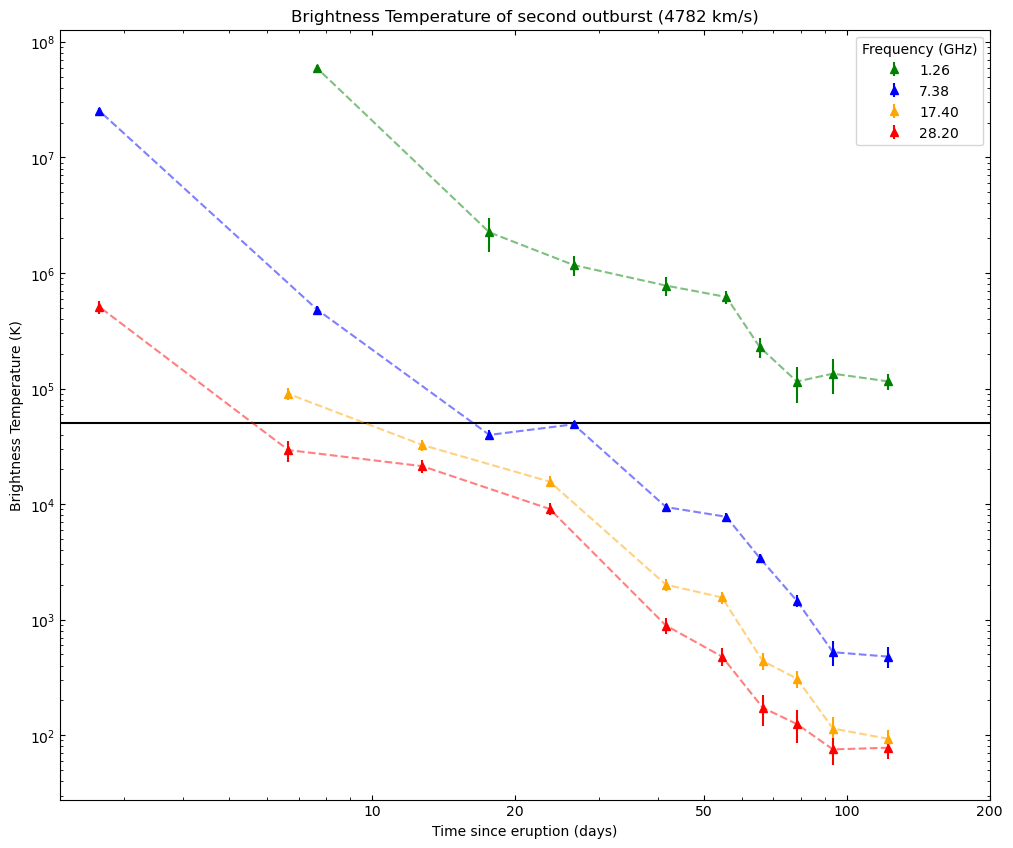

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.axhline(y=5*10**4, color='black', linestyle='-', linewidth=1.5)

ax.errorbar(days1_26, CTB_nu0, yerr=CTBError_nu0, fmt='^', color='green', label='1.26')
ax.plot(days1_26, CTB_nu0, color='green', linestyle = '--', alpha=.50)

ax.errorbar(days7_38, CTB_nu1, yerr=CTBError_nu1, fmt='^', color='blue', label='7.38')
ax.plot(days7_38, CTB_nu1, color='blue', linestyle = '--', alpha=.50)

ax.errorbar(days17_4, CTB_nu2, yerr=CTBError_nu2, fmt='^', color='orange', label='17.40')
ax.plot(days17_4, CTB_nu2, color='orange', linestyle = '--', alpha=.50)

ax.errorbar(days28_2, CTB_nu3, yerr=CTBError_nu3, fmt='^', color='red', label='28.20')
ax.plot(days28_2, CTB_nu3, color='red', linestyle = '--', alpha=.50)

ax.set_xscale('log')
ax.set_xticks([10,20,50,100,200], labels = ['10','20','50','100','200'])
ax.set_yscale('log')
#ax.set_yticks([.1,1,10], labels = ['0.1','1.0','10.0'])
ax.set_xlabel("Time since eruption (days)")
ax.set_ylabel("Brightness Temperature (K)")


ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("Brightness Temperature of second outburst (4782 km/s)")
plt.legend(title='Frequency (GHz)')
plt.show();

## First Shock Now

In [29]:

Dist =  7.79 * 3.086*10**21                 #distance in cm
V_const =  1659* 100000        #velocity in cm/s


def Con_TB(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []
    
    for i in range(len(S)):
        R.append(V_const * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Dist)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)
        

In [30]:
nu0 = 1.26 #FREQUENCY 1
nu1 = 7.38 #frequency 2
nu2 = 17.4 #frequency 3
nu3 = 28.2 #frequency 4

date_CAC_sec_n0 = days1_26 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))
date_CAC_sec_n1 = days7_38 * 86400    #time in seconds 
date_CAC_sec_n2 = days17_4 * 86400    #time in seconds 
date_CAC_sec_n3 = days28_2 * 86400    #time in seconds 

In [31]:
CTB_nu0, CTBError_nu0 = Con_TB(flux1_26, date_CAC_sec_n0, flux_err1_26, nu0)

CTB_nu0

[957701.617419693,
 1117508.763413633,
 955555.706531066,
 1901795.63378369,
 5149087.372544279,
 6459185.097715846,
 9744357.481653478,
 18679539.899438173,
 491516217.35635716]

In [32]:
CTB_nu1, CTBError_nu1 = Con_TB(flux7_38, date_CAC_sec_n1, flux_err7_38, nu1)

CTB_nu1

[3972.7109147071424,
 4343.282126295302,
 12098.992261271364,
 28467.156535727052,
 64522.468966369546,
 78218.47154508991,
 407075.30992525286,
 329789.2597614728,
 4006185.790059981,
 210524670.4818425]

In [33]:
CTB_nu2, CTBError_nu2 = Con_TB(flux17_4, date_CAC_sec_n2, flux_err17_4, nu2)

CTB_nu2


[772.6084574811756,
 947.9647183708506,
 2565.3686599486778,
 3641.1876404213185,
 12919.772255965116,
 16669.324305461636,
 129982.7701607526,
 269859.52296733693,
 746959.8527148146]

In [34]:
CTB_nu3, CTBError_nu3 = Con_TB(flux28_2, date_CAC_sec_n3, flux_err28_2, nu3)

CTB_nu3

[647.1164183031558,
 626.0161804699522,
 1036.2283382971261,
 1436.0612772675165,
 3981.848799144909,
 7386.28960247883,
 75376.67168984907,
 176865.38440251534,
 243871.53591975992,
 4238579.105887244]

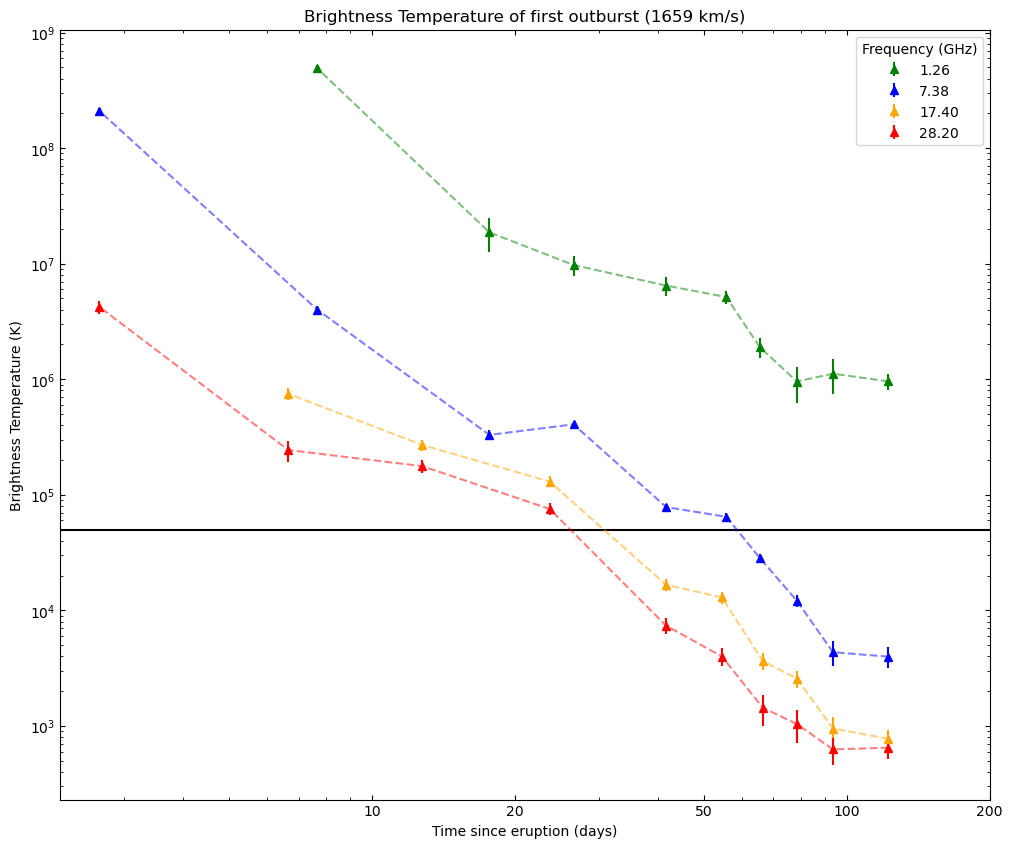

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.axhline(y=5*10**4, color='black', linestyle='-', linewidth=1.5)

ax.errorbar(days1_26, CTB_nu0, yerr=CTBError_nu0, fmt='^', color='green', label='1.26')
ax.plot(days1_26, CTB_nu0, color='green', linestyle = '--', alpha=.50)

ax.errorbar(days7_38, CTB_nu1, yerr=CTBError_nu1, fmt='^', color='blue', label='7.38')
ax.plot(days7_38, CTB_nu1, color='blue', linestyle = '--', alpha=.50)

ax.errorbar(days17_4, CTB_nu2, yerr=CTBError_nu2, fmt='^', color='orange', label='17.40')
ax.plot(days17_4, CTB_nu2, color='orange', linestyle = '--', alpha=.50)

ax.errorbar(days28_2, CTB_nu3, yerr=CTBError_nu3, fmt='^', color='red', label='28.20')
ax.plot(days28_2, CTB_nu3, color='red', linestyle = '--', alpha=.50)

ax.set_xscale('log')
ax.set_xticks([10,20,50,100,200], labels = ['10','20','50','100','200'])
ax.set_yscale('log')
#ax.set_yticks([.1,1,10], labels = ['0.1','1.0','10.0'])
ax.set_xlabel("Time since eruption (days)")
ax.set_ylabel("Brightness Temperature (K)")

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("Brightness Temperature of first outburst (1659 km/s)")
plt.legend(title='Frequency (GHz)')
plt.show();